# Facebook metrics Data Set




### Import libraries
We need to import  all the modules, functions  before using them

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


To make sure that every single line will be  printed, even if they're in the same cell, we can use thf ollowing config:

# Importing your data



**Facebook metrics Data Set**: Business study; 500 data points (instances); 19 features (attributes)

4 Feature Types:

1- **Identification—features** that allow identifying each individual post

2- **Content**—the textual content of the post

3- **Categorization**—features that characterize the post Performance


***7 Inputs*** (Message, link etc.) + ***12 Outputs*** (Likes, Interactions etc.)

In [18]:
input_path = '/content/gdrive/My Drive/ML_Course/'


# Working with Facebook metrics dataset
target_dataset = pd.read_csv(input_path+'dataset_Facebook.csv', sep=';')
target_dataset.shape
target_dataset




Page total likes    Type  Category  ...    like  share  Total Interactions
0              139441   Photo         2  ...    79.0   17.0                 100
1              139441  Status         2  ...   130.0   29.0                 164
2              139441   Photo         3  ...    66.0   14.0                  80
3              139441   Photo         2  ...  1572.0  147.0                1777
4              139441   Photo         2  ...   325.0   49.0                 393
..                ...     ...       ...  ...     ...    ...                 ...
495             85093   Photo         3  ...    53.0   26.0                  84
496             81370   Photo         2  ...    53.0   22.0                  75
497             81370   Photo         1  ...    93.0   18.0                 115
498             81370   Photo         3  ...    91.0   38.0                 136
499             81370   Photo         2  ...    91.0   28.0                 119

[500 rows x 19 columns]

In [15]:
# target_dataset = pd.get_dummies(target_dataset, columns=['Type', 'Category'])

# target_dataset

Page total likes  Post Month  ...  Category_2  Category_3
0              139441          12  ...           1           0
1              139441          12  ...           1           0
2              139441          12  ...           0           1
3              139441          12  ...           1           0
4              139441          12  ...           1           0
..                ...         ...  ...         ...         ...
495             85093           1  ...           0           1
496             81370           1  ...           1           0
497             81370           1  ...           0           0
498             81370           1  ...           0           1
499             81370           1  ...           1           0

[500 rows x 24 columns]

In [19]:
target_dataset['Type'].value_counts()

Photo     426
Status     45
Link       22
Video       7
Name: Type, dtype: int64

In [10]:
### Preparing data
# converting strings in categorical features to integers
cat_columns = target_dataset.select_dtypes(['object']).columns
target_dataset[cat_columns] = target_dataset[cat_columns].apply(lambda x: pd.factorize(x)[0])

# replace infinity values with Nans
# Fill Nans with 0
target_dataset = target_dataset.replace([np.inf, -np.inf], np.nan)
target_dataset = target_dataset.fillna(0)
target_dataset.head

<bound method NDFrame.head of      Page total likes  Type  Category  ...    like  share  Total Interactions
0              139441     0         2  ...    79.0   17.0                 100
1              139441     1         2  ...   130.0   29.0                 164
2              139441     0         3  ...    66.0   14.0                  80
3              139441     0         2  ...  1572.0  147.0                1777
4              139441     0         2  ...   325.0   49.0                 393
..                ...   ...       ...  ...     ...    ...                 ...
495             85093     0         3  ...    53.0   26.0                  84
496             81370     0         2  ...    53.0   22.0                  75
497             81370     0         1  ...    93.0   18.0                 115
498             81370     0         3  ...    91.0   38.0                 136
499             81370     0         2  ...    91.0   28.0                 119

[500 rows x 19 columns]>

### Summarize the Dataset



*   Dimensions of the dataset.
*   Describtion of the dataset.

  Statistical summary of all attributes.
  
*   Class Distribution



**Statistical Summary**

In [12]:
# descriptions

print(target_dataset.describe())

       Page total likes  Post Month  ...  Category_2  Category_3
count        500.000000  500.000000  ...  500.000000  500.000000
mean      123194.176000    7.038000  ...    0.260000    0.310000
std        16272.813214    3.307936  ...    0.439074    0.462956
min        81370.000000    1.000000  ...    0.000000    0.000000
25%       112676.000000    4.000000  ...    0.000000    0.000000
50%       129600.000000    7.000000  ...    0.000000    0.000000
75%       136393.000000   10.000000  ...    1.000000    1.000000
max       139441.000000   12.000000  ...    1.000000    1.000000

[8 rows x 24 columns]


In [13]:
target_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 24 columns):
Page total likes                                                       500 non-null int64
Post Month                                                             500 non-null int64
Post Weekday                                                           500 non-null int64
Post Hour                                                              500 non-null int64
Paid                                                                   500 non-null float64
Lifetime Post Total Reach                                              500 non-null int64
Lifetime Post Total Impressions                                        500 non-null int64
Lifetime Engaged Users                                                 500 non-null int64
Lifetime Post Consumers                                                500 non-null int64
Lifetime Post Consumptions                                             500 non-null

In [0]:
target_dataset['Paid'].value_counts()
target_dataset['like'].fillna(0,inplace=True)
target_dataset['share'].fillna(0,inplace=True)
target_dataset['Paid'].fillna(0,inplace=True)

In [22]:
# class distribution
print(target_dataset.groupby('Type').size())
#dataset.groupby('class').describe()

Type
Link       22
Photo     426
Status     45
Video       7
dtype: int64


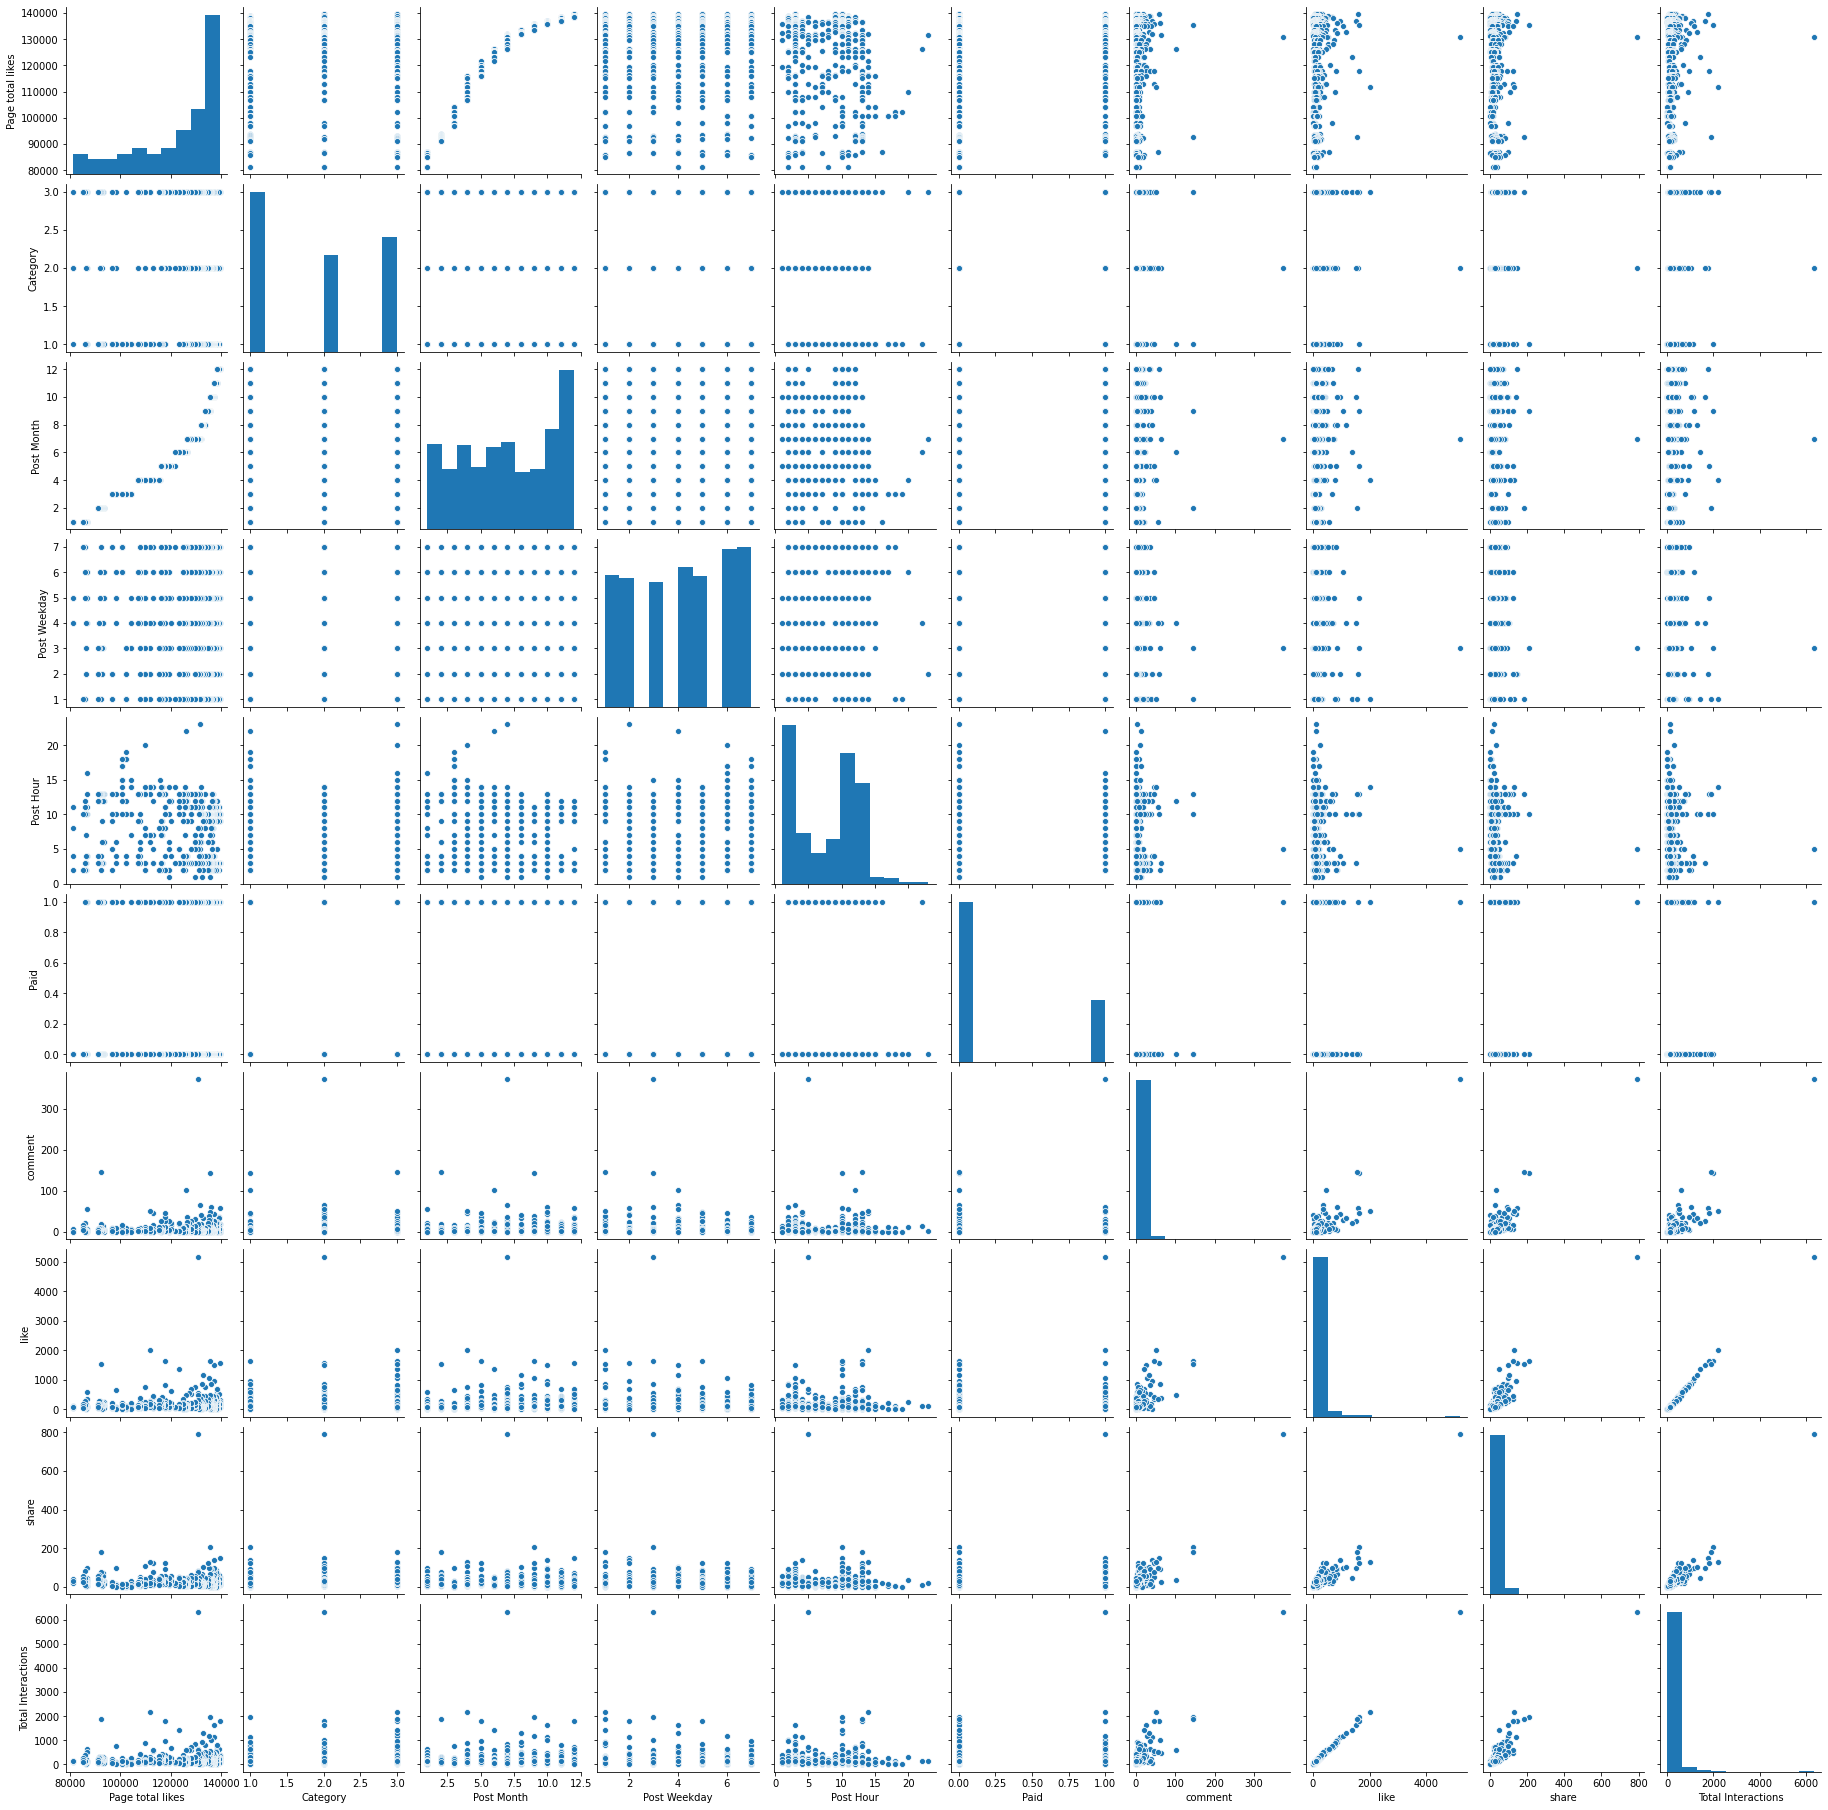

In [25]:
import seaborn as sns
target_dataset['Type'] = target_dataset['Type'].apply(lambda x: str(x))
plotdf = target_dataset.drop(target_dataset.columns[7:15],axis =1)
sns.pairplot(data=plotdf)

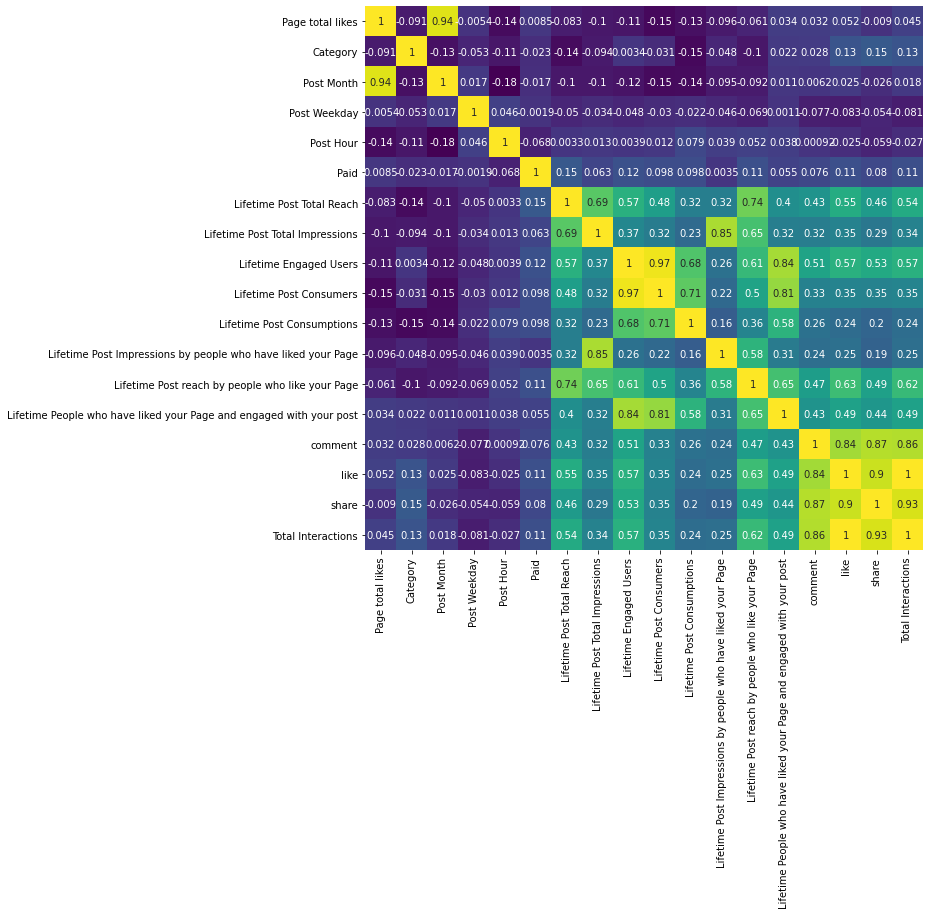

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(target_dataset.corr(),cmap='viridis',annot=True,cbar=False)


# predict the number of likes a post will get



### Removing Outliers and Binarizing Categorical Variables

In [29]:
outlierCut = np.percentile(target_dataset['like'],90)
outlierCut

330.1

In [0]:

target_dataset = target_dataset[target_dataset['like']<outlierCut]

In [0]:
def Weekday(x):
    if x == 1:
        return 'Su'
    elif x== 2:
        return 'Mo'
    elif x == 3:
        return 'Tu'
    elif x == 4:
        return 'We'
    elif x == 5:
        return 'Th'
    elif x ==6:
        return 'Fr'
    elif x == 7:
        return "Sa"

target_dataset['Weekday'] = target_dataset['Post Weekday'].apply(lambda x: Weekday(x))
target_dataset = pd.concat([target_dataset,pd.get_dummies(target_dataset['Weekday'])],axis=1)

In [0]:


hours = list(range(0,18))
#hours
for i in hours:
    hours[i] = str(hours[i])
    hours[i]='hr_'+ hours[i]

hourDf = pd.get_dummies(target_dataset['Post Hour'],prefix='hr_')
target_dataset = pd.concat([target_dataset,hourDf],axis=1)
monthDf = pd.get_dummies(target_dataset['Post Month'],prefix='Mo')
target_dataset = pd.concat([target_dataset,monthDf],axis=1)
target_dataset['Video'] = pd.get_dummies(target_dataset['Type'])['Video']
target_dataset['Status'] = pd.get_dummies(target_dataset['Type'])['Status']
target_dataset['Photo'] = pd.get_dummies(target_dataset['Type'])['Photo']
target_dataset['Cat_1'] = pd.get_dummies(target_dataset['Category'])[1]
target_dataset['Cat_2'] = pd.get_dummies(target_dataset['Category'])[2]

### Splitting data to training and testing sets

If we use one of our labeled fruit examples in the data that we use to train the classifier, we can't also use that same irish data as a test sample to also evaluate the classifier.

The machine learning Algorithm needs to work well on any input sample (Training Set), any new pieces of data that we might see in the future(Test Set).



To investigate performance of our model, we need to split the data to training and testing sets(validation set). This will help us to check potential overfitting in our model training.

**random_state** as the name suggests, is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices in your case.

In [0]:
from sklearn.model_selection import train_test_split
x_columns = ['Page total likes','Paid','Video','Status','Photo',
    'Cat_1','Cat_2','Mo','Tu','Sa',"We",'Th','Fr',
       'hr__17','hr__1','hr__2','hr__3','hr__4','hr__5', 'hr__6','hr__7','hr__8',
        'hr__9','hr__10','hr__11','hr__12','hr__13','hr__14','hr__15','hr__16','Mo_1',
       'Mo_2','Mo_12','Mo_4','Mo_5','Mo_6','Mo_7','Mo_8','Mo_9','Mo_11','Mo_10']
y_column = 'like'
X_train, X_test, y_train, y_test = train_test_split(target_dataset[x_columns], target_dataset[y_column], test_size=0.30, random_state=5)


In [38]:
print(f'train: {X_train.size}')
print(f'test: {X_test.size}')

train: 12915
test: 5535


# Building regression models




## Regression Model

In [39]:
from sklearn.linear_model import LinearRegression

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
print(y_pred)


[107.21413403  78.05365673 132.55926225  88.86170132 130.8443516
 117.26569955 144.65107128 138.22036458  65.60005144 120.03508309
 146.96625577 138.25544208 114.17281838  77.75152635  93.48242669
 131.79861536  90.94592167  66.4542625  140.04205487  73.82823163
  41.36931437 144.55317183  94.3248054  120.82112578 119.93617139
 107.60634357  70.8944245   26.92139768 108.04993996 131.37100373
 176.2053317  117.13892327  46.73083468 107.72446137  82.75940681
 170.44290193 138.82290103  -2.49343716 155.68723658 137.61423315
 108.50244272 128.43322056 111.37275374  62.66573797 137.14224334
 138.48084792 124.6058874   92.22078738 139.027646   163.71408095
 123.7845189  102.43385475 177.77910054 132.13701292 123.77811005
 142.13423119  68.63060999  69.85860785  83.39420654  89.4489961
 148.64716556 134.47239605  54.69694937  72.5672597   70.52834396
  88.52215587 150.06668408 104.39127507  81.84595422 129.63840673
 136.57294051 154.5363578   92.58941642 178.70234406 128.35829358
 107.4597590

In [42]:
from sklearn import metrics

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % metrics.mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f"
      % metrics.mean_absolute_error(y_test, y_pred))



Coefficients: 
 [ 8.64174746e-03  1.34434215e+01  8.63833049e+01  6.06122560e+01
  4.34157624e+01 -4.01887445e+01 -1.34967941e+01 -7.65250682e+00
 -1.23203960e+01 -1.89754406e+01  1.99061525e+01 -3.01893011e+00
  1.14766970e+01  1.00070663e+02  4.33109263e+01  2.43020777e+01
  4.47019384e+01  3.77640525e+01  3.73843901e+01  2.72883077e+01
  4.50369210e+01  1.92990426e+01  2.92444334e+01  5.63770422e+01
  3.51290246e+01  2.84290969e+01  5.78422910e+01  3.65982597e+01
 -2.47880156e+01  1.87014848e-11  1.24448747e+02  1.18176723e+02
 -3.22963294e+02 -7.57073727e+01 -1.37668046e+02 -2.10260529e+02
 -2.42637666e+02 -2.82985916e+02 -2.63150716e+02 -2.87920635e+02
 -3.12654890e+02]
Mean squared error: 5060.69
Mean absolute error: 57.50
